In [4]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=0af98bfbb10afa91e52a2fc12b2b433511c3e99f0886df8d7db077623eae5200
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra fonts-nanum fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 39.7 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Selecting previously unselected package

In [5]:
import pyspark
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pyspark.sql  as pyspark_sql
import pyspark.sql.types as pyspark_types
import pyspark.sql.functions  as F
from pyspark import SparkContext, SparkConf
from pyspark.sql import Window

In [6]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = pyspark_sql.SparkSession.builder.getOrCreate()

In [7]:
# Load 3 datasets
data1 = spark.read.csv("Dataset/col_mat_nuw_output.csv", header=False, inferSchema=True)
data2 = spark.read.csv("Dataset/kan_output.csv", header=False, inferSchema=True)
data3 = spark.read.csv("Dataset/mon_kur_jaf_output.csv", header=False, inferSchema=True)

In [8]:
data1.show(5)
data2.show(5)
data3.show(5)

+--------------------+--------------+----------+----------+
|                 _c0|           _c1|       _c2|       _c3|
+--------------------+--------------+----------+----------+
|1.969834395781014...|Colombo Proper|2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|2019-01-05|2019-01-06|
+--------------------+--------------+----------+----------+
only showing top 5 rows

+--------------------+------------+----------+----------+
|                 _c0|         _c1|       _c2|       _c3|
+--------------------+------------+----------+----------+
|1.760713459877335...|Kandy Proper|2019-01-01|2019-01-02|
|9.220391253917748E-5|Kandy Proper|2019-01-02|2019-01-03|
|                NULL|Kandy Proper|2019-01-03|2019-01-04|
|1.908681983853839...|Kandy Proper|2019-01-04|2019-01-05|
|1.219517840206744...|Kandy P

In [9]:
# Add Column Names of data1
data1 = data1.toDF("_c1", "_c2", "_c3", "_c4").withColumnRenamed("_c1", "HCHO reading").withColumnRenamed("_c2", "Location").withColumnRenamed("_c3", "Current Date").withColumnRenamed("_c4", "Next Date")

# Show DataFrame with renamed columns
data1.show(5)

+--------------------+--------------+------------+----------+
|        HCHO reading|      Location|Current Date| Next Date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
+--------------------+--------------+------------+----------+
only showing top 5 rows



In [10]:
# Add Column Names of data2
data2 = data2.toDF("_c1", "_c2", "_c3", "_c4").withColumnRenamed("_c1", "HCHO reading").withColumnRenamed("_c2", "Location").withColumnRenamed("_c3", "Current Date").withColumnRenamed("_c4", "Next Date")

# Show DataFrame with renamed columns
data2.show(5)

+--------------------+------------+------------+----------+
|        HCHO reading|    Location|Current Date| Next Date|
+--------------------+------------+------------+----------+
|1.760713459877335...|Kandy Proper|  2019-01-01|2019-01-02|
|9.220391253917748E-5|Kandy Proper|  2019-01-02|2019-01-03|
|                NULL|Kandy Proper|  2019-01-03|2019-01-04|
|1.908681983853839...|Kandy Proper|  2019-01-04|2019-01-05|
|1.219517840206744...|Kandy Proper|  2019-01-05|2019-01-06|
+--------------------+------------+------------+----------+
only showing top 5 rows



In [11]:
# Add Column Names of data3
data3 = data3.toDF("_c1", "_c2", "_c3", "_c4").withColumnRenamed("_c1", "HCHO reading").withColumnRenamed("_c2", "Location").withColumnRenamed("_c3", "Current Date").withColumnRenamed("_c4", "Next Date")

# Show DataFrame with renamed columns
data3.show(5)

+--------------------+------------------+------------+----------+
|        HCHO reading|          Location|Current Date| Next Date|
+--------------------+------------------+------------+----------+
|                NULL|Bibile, Monaragala|  2019-01-01|2019-01-02|
|1.919914652467399E-5|Bibile, Monaragala|  2019-01-02|2019-01-03|
|2.811447935930283...|Bibile, Monaragala|  2019-01-03|2019-01-04|
|3.747998184385943E-5|Bibile, Monaragala|  2019-01-04|2019-01-05|
|-1.79826087934531...|Bibile, Monaragala|  2019-01-05|2019-01-06|
+--------------------+------------------+------------+----------+
only showing top 5 rows



In [12]:
# Get the number of rows
num_rows = data1.count()
print("Number of rows in data1:", num_rows)
num_rows = data2.count()
print("Number of rows in data2:", num_rows)
num_rows = data3.count()
print("Number of rows in data3:", num_rows)

Number of rows in data1: 5478
Number of rows in data2: 1826
Number of rows in data3: 5478


## Analyzing The Dataset

In [13]:
# Union the three DataFrames to combine them
full_data = data1.union(data2).union(data3)

num_rows = full_data.count()
print("Number of rows in full dataset:", num_rows)

Number of rows in full dataset: 12782


In [14]:
column_data_types = full_data.dtypes

# Display the data type of each column
for column, data_type in column_data_types:
    print(f"{column}  -  {data_type}")

HCHO reading  -  double
Location  -  string
Current Date  -  date
Next Date  -  date


In [15]:
# Display the data count of each location
location_count = full_data.groupBy("Location").count().orderBy("Location")
location_count.show()

+-------------------+-----+
|           Location|count|
+-------------------+-----+
| Bibile, Monaragala| 1826|
|     Colombo Proper| 1826|
|   Deniyaya, Matara| 1826|
|      Jaffna Proper| 1826|
|       Kandy Proper| 1826|
|  Kurunegala Proper| 1826|
|Nuwara Eliya Proper| 1826|
+-------------------+-----+



In [16]:
# Null value count for full dataset
null_value_count = full_data.select([F.sum(F.when(F.col(column).isNull(), 1).otherwise(0)).alias(column) for column in full_data.columns])

null_value_count.show()

+------------+--------+------------+---------+
|HCHO reading|Location|Current Date|Next Date|
+------------+--------+------------+---------+
|        4864|       0|           0|        0|
+------------+--------+------------+---------+



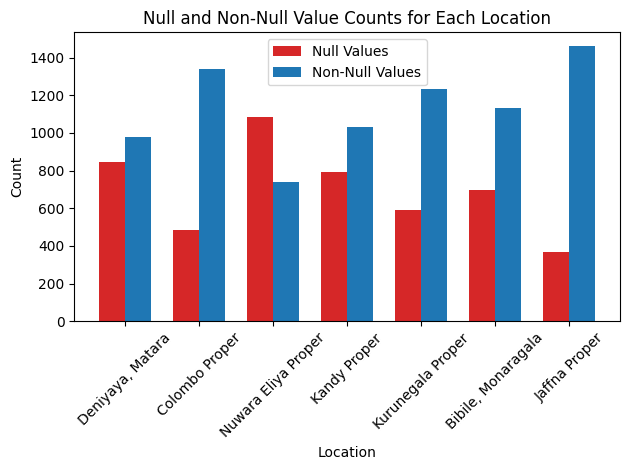

In [17]:
# Calculate counts of null and non-null values for each location
null_counts = full_data.groupBy("Location").agg(F.sum(F.when(F.col("HCHO reading").isNull(), 1).otherwise(0)).alias("null_count"))
non_null_counts = full_data.groupBy("Location").agg(F.sum(F.when(F.col("HCHO reading").isNotNull(), 1).otherwise(0)).alias("non_null_count"))

# Extracting data for plotting
locations = [row["Location"] for row in null_counts.collect()]
null_values = [row["null_count"] for row in null_counts.collect()]
non_null_values = [row["non_null_count"] for row in non_null_counts.collect()]

# Plotting
fig, ax = plt.subplots()
bar_width = 0.35
x = range(len(locations))

bar1 = ax.bar(x, null_values, width=bar_width, color='C3', label='Null Values')
bar2 = ax.bar([i + bar_width for i in x], non_null_values, width=bar_width, color='C0', label='Non-Null Values')

ax.set_ylabel('Count')
ax.set_xlabel('Location')
ax.set_title('Null and Non-Null Value Counts for Each Location')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(locations, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

In [18]:
# Count the duplicate rows
duplicate_count = full_data.groupBy(full_data.columns).count().where(F.col("count") > 1).count()

# Show the count of duplicate rows
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


In [19]:
# Check for the minimum value
min_value = full_data.agg({"HCHO reading": "min"}).collect()[0][0]
print("Minimum value:", min_value)

# Check for the maximum value
max_value = full_data.agg({"HCHO reading": "max"}).collect()[0][0]
print("Maximum value:", max_value)

Minimum value: -0.0003524730243572399
Maximum value: 0.0008997101837438971


In [20]:
# Check for negative values
negative_values = full_data.filter(full_data['HCHO reading'] < 0).count()
negative_values

563

## Cleaning The Dataset

In [21]:
# Convert negative values to NaN
full_data = full_data.withColumn("HCHO reading", F.when(full_data["HCHO reading"] < 0, None).otherwise(full_data["HCHO reading"]))
full_data.show(20)

+--------------------+--------------+------------+----------+
|        HCHO reading|      Location|Current Date| Next Date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|                NULL|Colombo Proper|  2019-01-13|2019-01-14|
|1.33629

In [22]:
# Null value count for full dataset
null_value_count = full_data.select([F.sum(F.when(F.col(column).isNull(), 1).otherwise(0)).alias(column) for column in full_data.columns])

null_value_count.show()

+------------+--------+------------+---------+
|HCHO reading|Location|Current Date|Next Date|
+------------+--------+------------+---------+
|        5427|       0|           0|        0|
+------------+--------+------------+---------+



In [47]:
# Function to handle missing values HCHO reading
def handling_missing_values(ocation_df, location_name):
  window = Window.orderBy("Current Date")

  # Backfill - Fill missing values with next data point
  location_backfilled = location_df.withColumn("HCHO reading", F.last("HCHO reading", ignorenulls=True).over(window))

  # Frontfill - Fill missing values with previous data
  window_desc = Window.orderBy(F.col("Current Date").desc())
  location_backfilled = location_backfilled.withColumn("HCHO reading",
                                                        F.when(F.col("HCHO reading").isNull(),
                                                              F.lag("HCHO reading", 1).over(window_desc))
                                                        .otherwise(F.col("HCHO reading")))

  return location_backfilled


In [54]:
# Function to handle outliers in HCHO reading by location (Z-score technique)
def handling_outliers(location_df, location_name):
    # Calculate mean and standard deviation of the column
    location_mean_value = location_df.selectExpr("avg(`HCHO reading`)").collect()[0][0]
    location_stddev_value = location_df.selectExpr("stddev(`HCHO reading`)").collect()[0][0]

    # Calculate Z-score for the column
    location_with_zscore = location_df.withColumn("z_score", (F.col("HCHO reading") - location_mean_value) / location_stddev_value)

    # Convert to Pandas DataFrame
    location_pd = location_with_zscore.toPandas()

    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))

    # Plot boxplot with outliers
    sns.boxplot(x='Location', y='HCHO reading', data=location_pd, ax=axs[0], color='C0')
    axs[0].set_title(f'Boxplot of HCHO-Reading with outliers in {location_name}')
    axs[0].set_xlabel('Location')
    axs[0].set_ylabel('HCHO reading')

    # Filter out outliers
    threshold = 1.95
    location_filtered_df = location_with_zscore.filter(F.col("z_score").between(-threshold, threshold))

    # Convert to Pandas DataFrame
    location_filtered_pd = location_filtered_df.toPandas()

    # Plot boxplot without outliers
    sns.boxplot(x='Location', y='HCHO reading', data=location_filtered_pd, ax=axs[1], color='C0')
    axs[1].set_title(f'Boxplot of HCHO-Reading without outliers in {location_name}')
    axs[1].set_xlabel('Location')
    axs[1].set_ylabel('HCHO-reading')
    plt.show()
    print("\n")

    # Plotting
    plt.figure(figsize=(20, 6), dpi=80, linewidth=10)
    plt.plot(location_filtered_df.select("Current Date").collect(), location_filtered_df.select("HCHO reading").collect(), color='C0')
    plt.title(f'HCHO Reading in {location_name} after cleaning')
    plt.xlabel('Current Date', fontsize=14)
    plt.ylabel('HCHO Reading', fontsize=14)
    plt.show()
    print("\n")

    return location_filtered_df

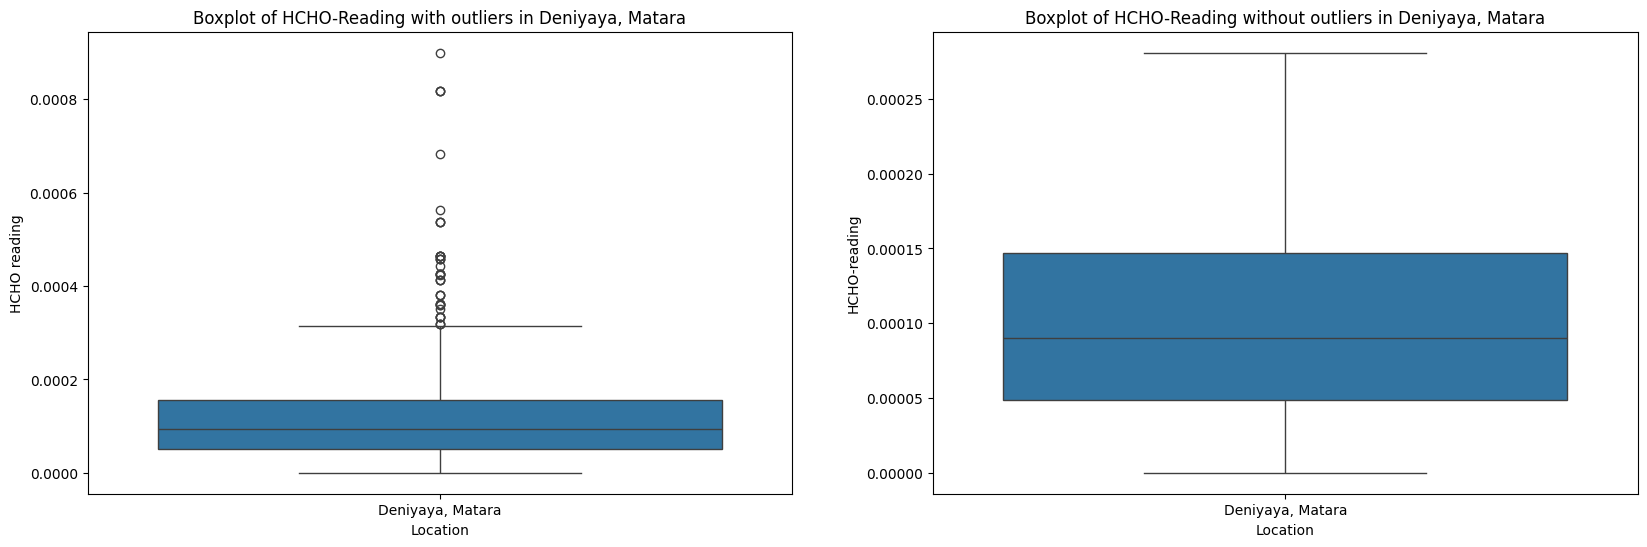

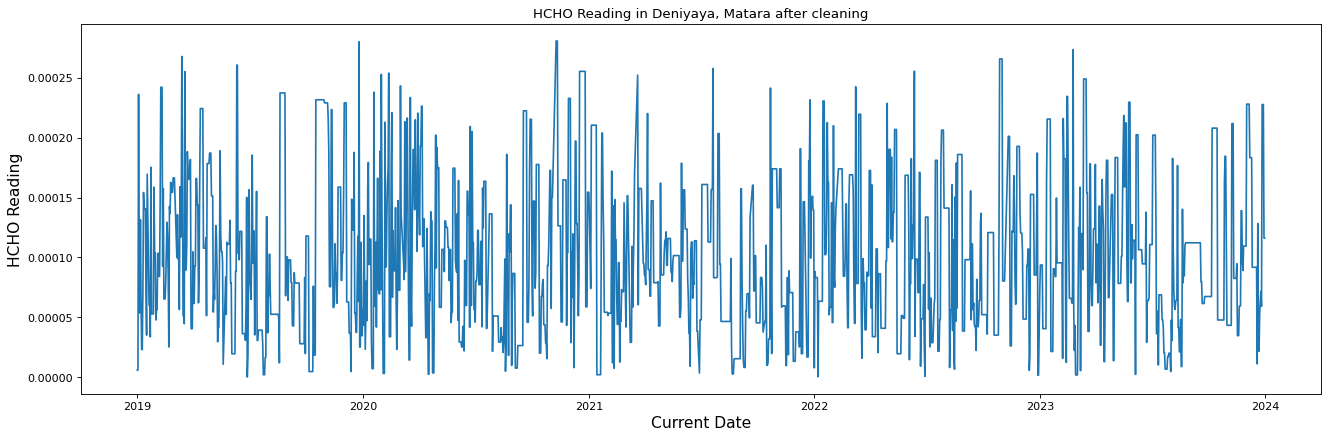

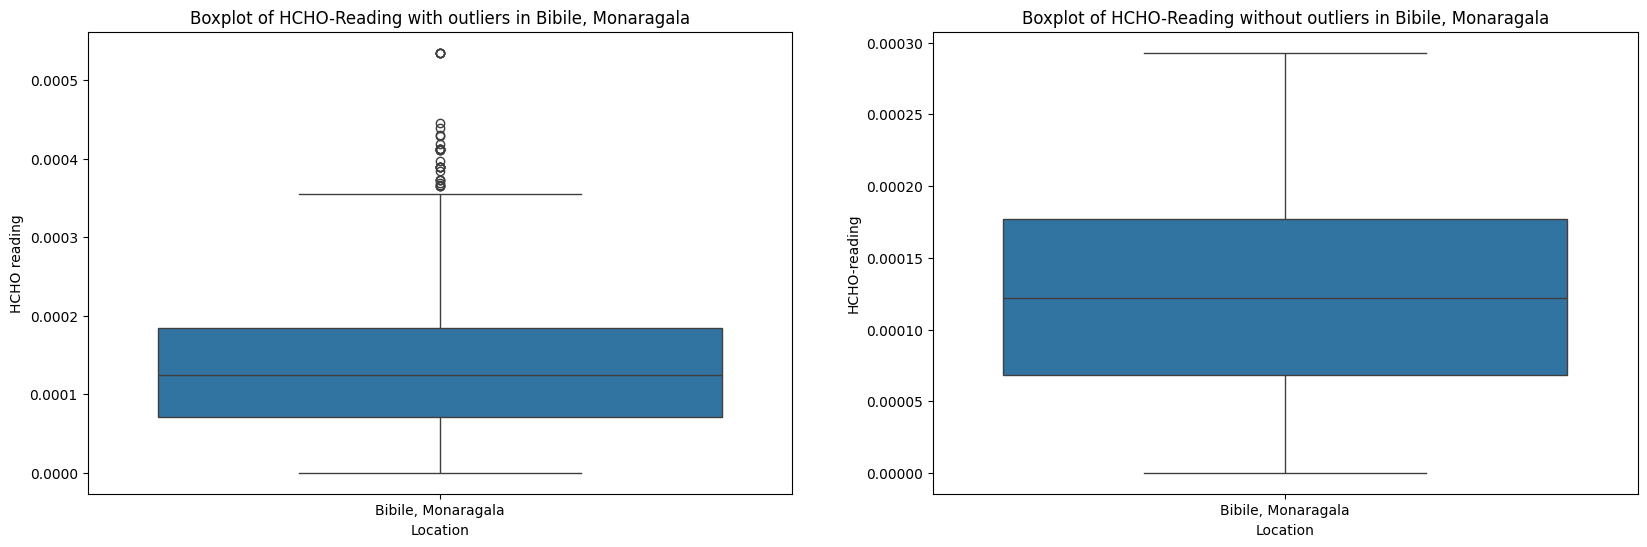

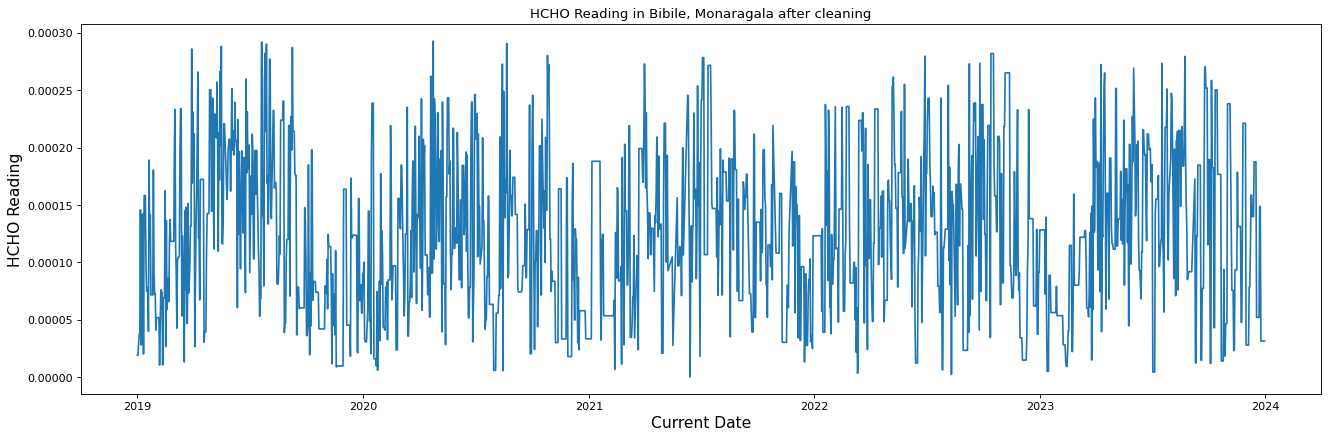

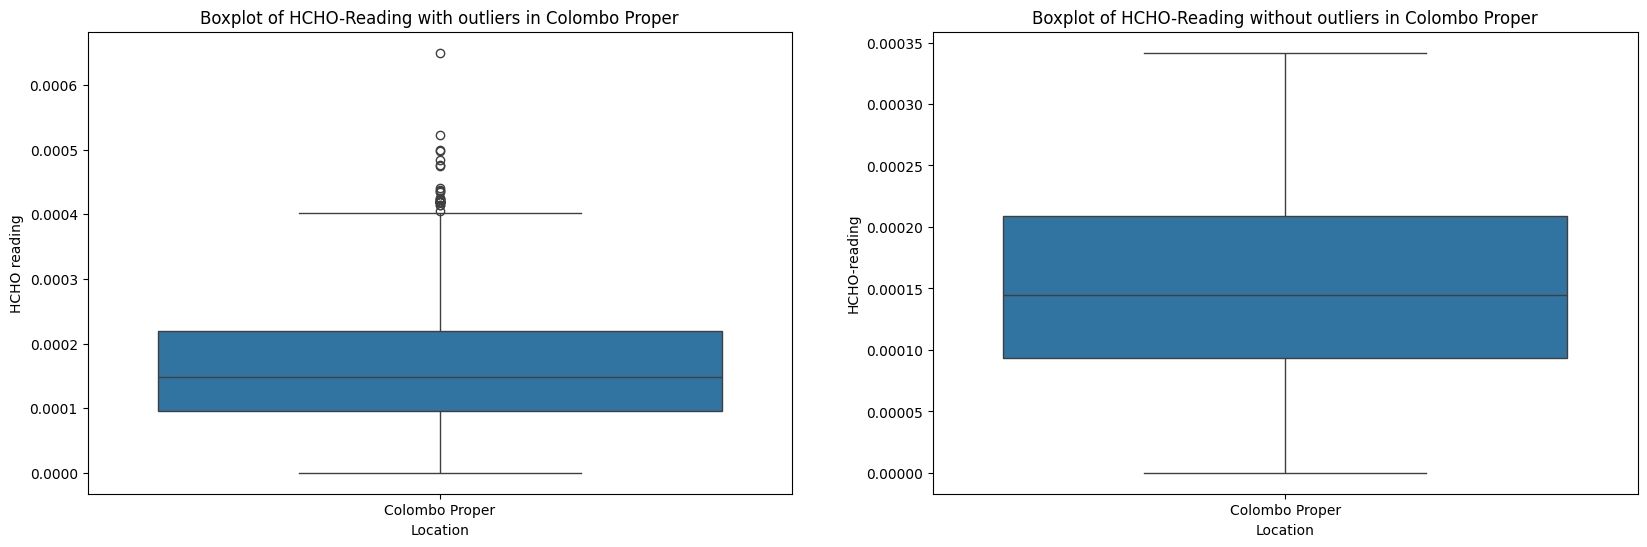

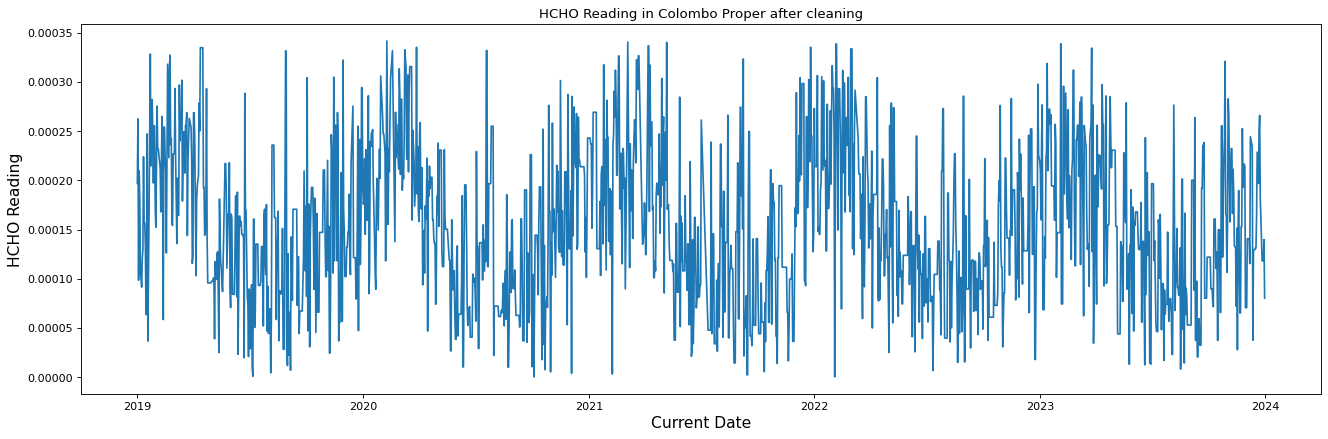

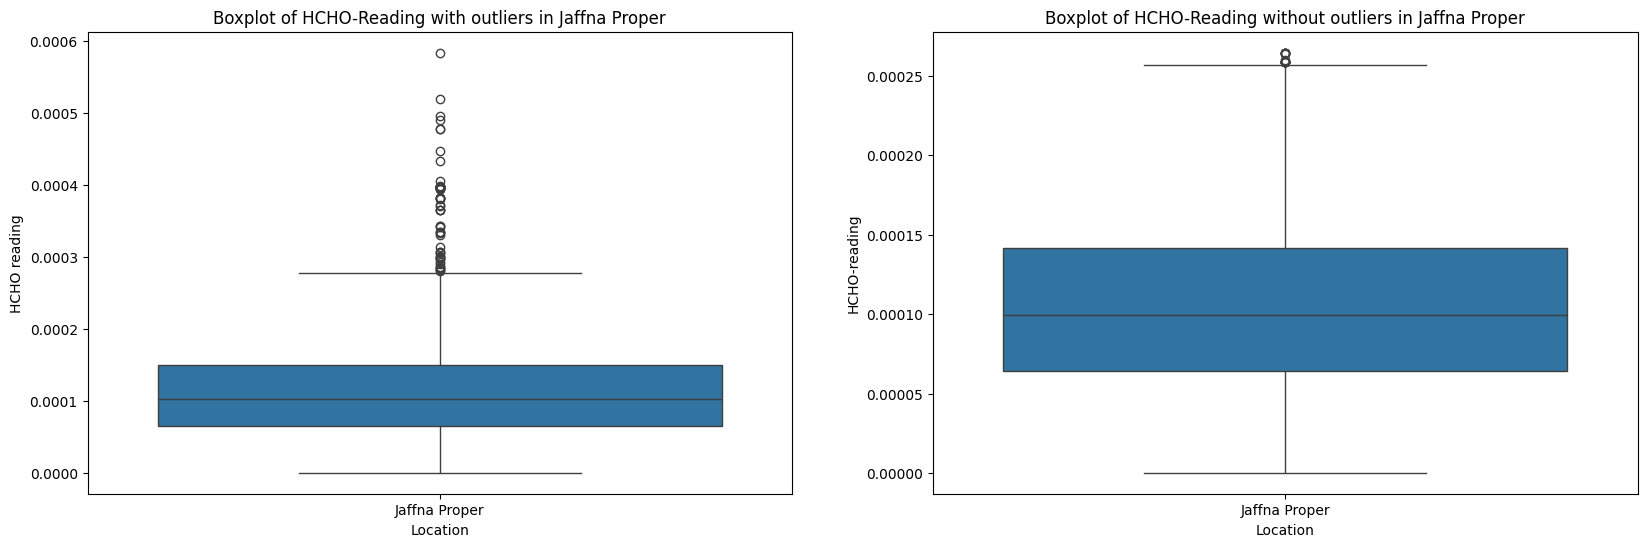

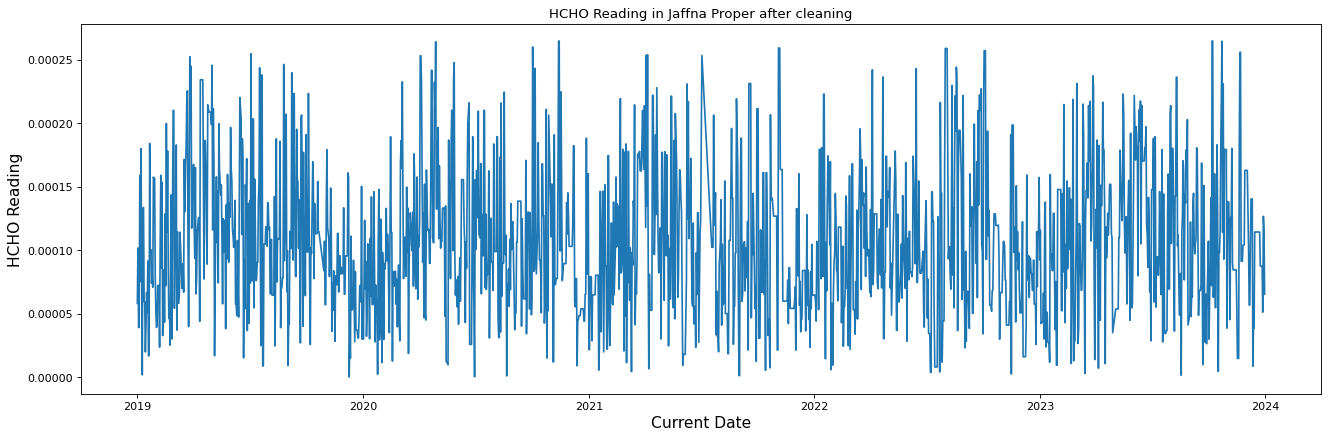

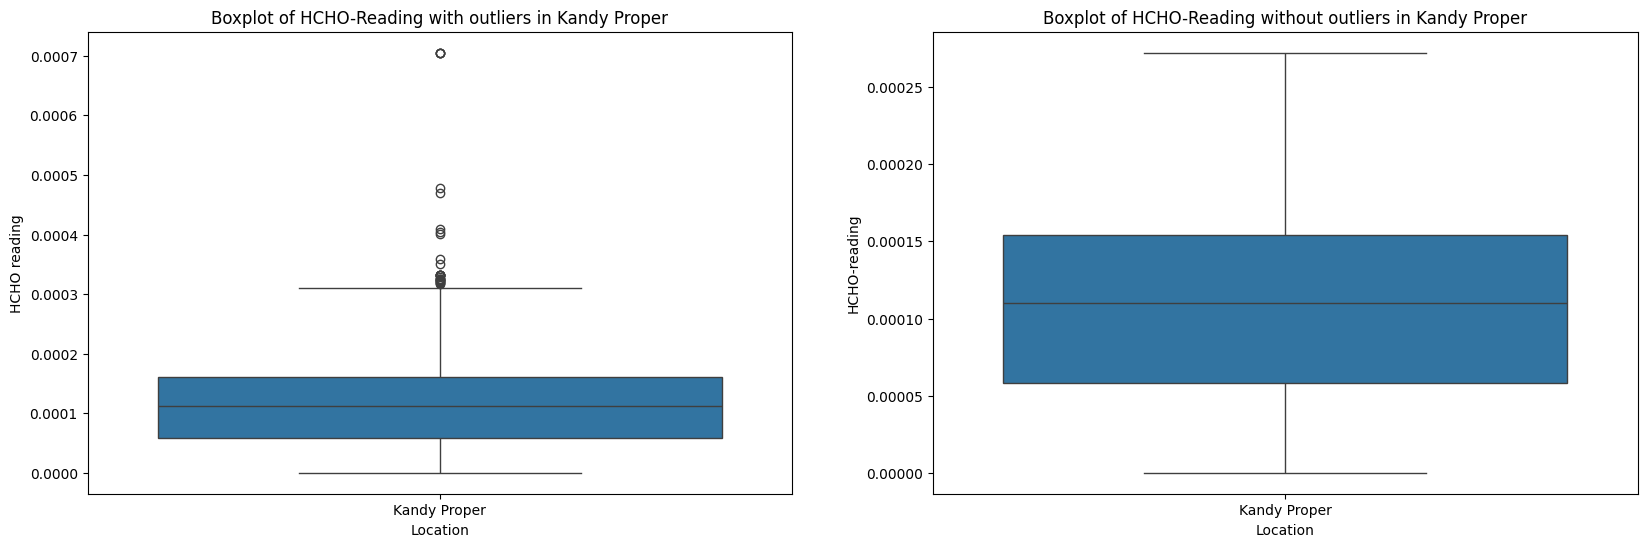

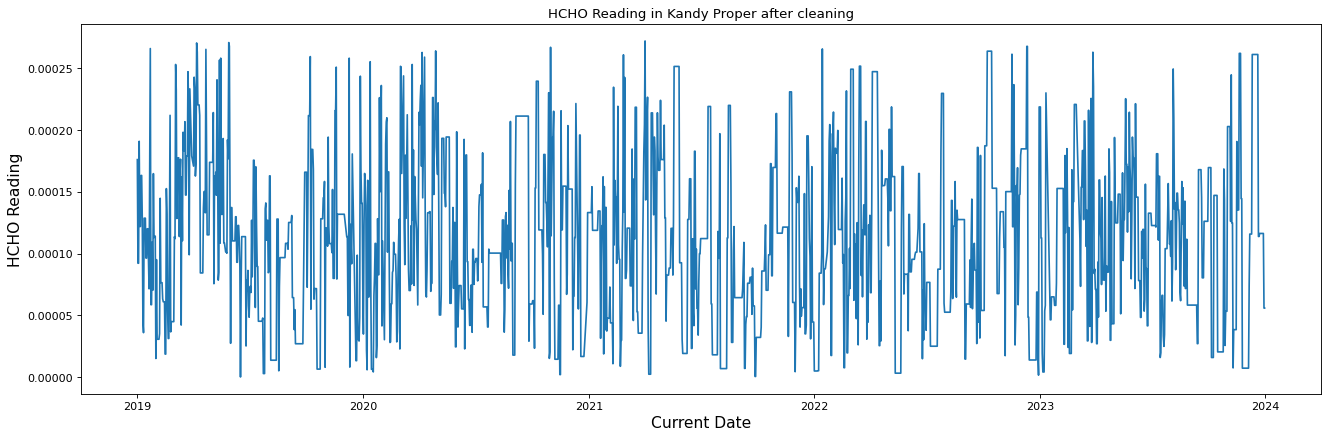

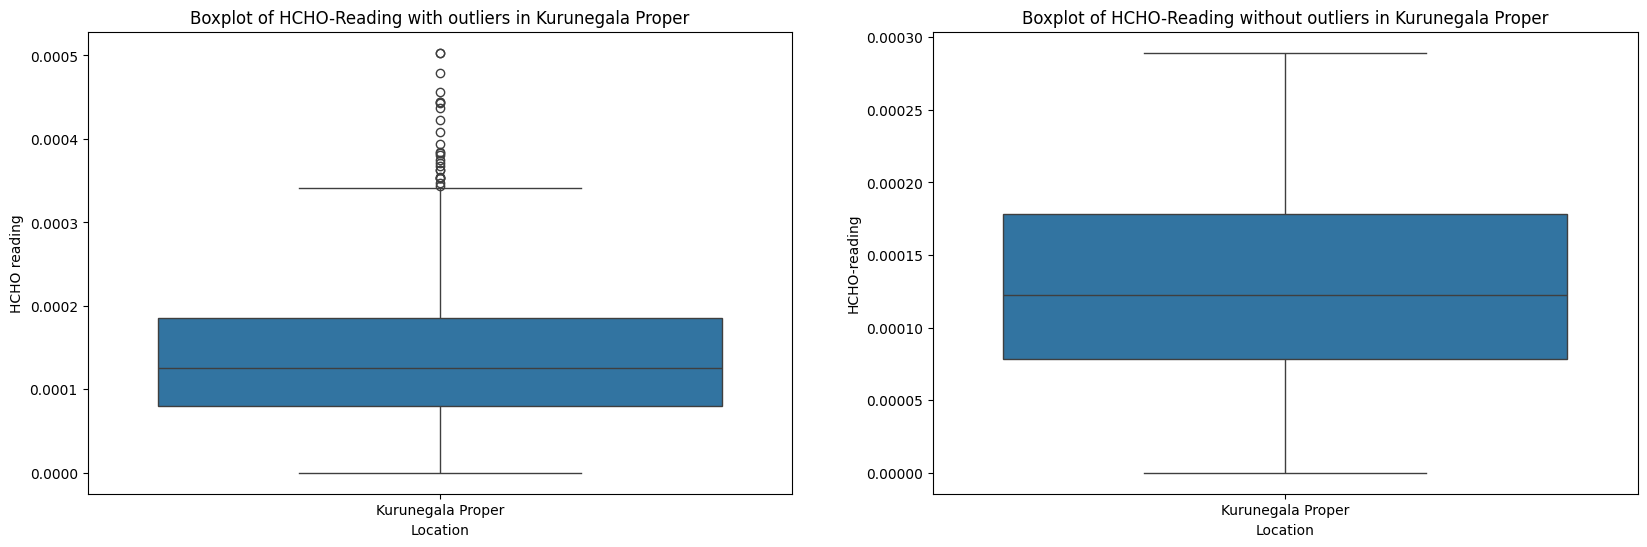

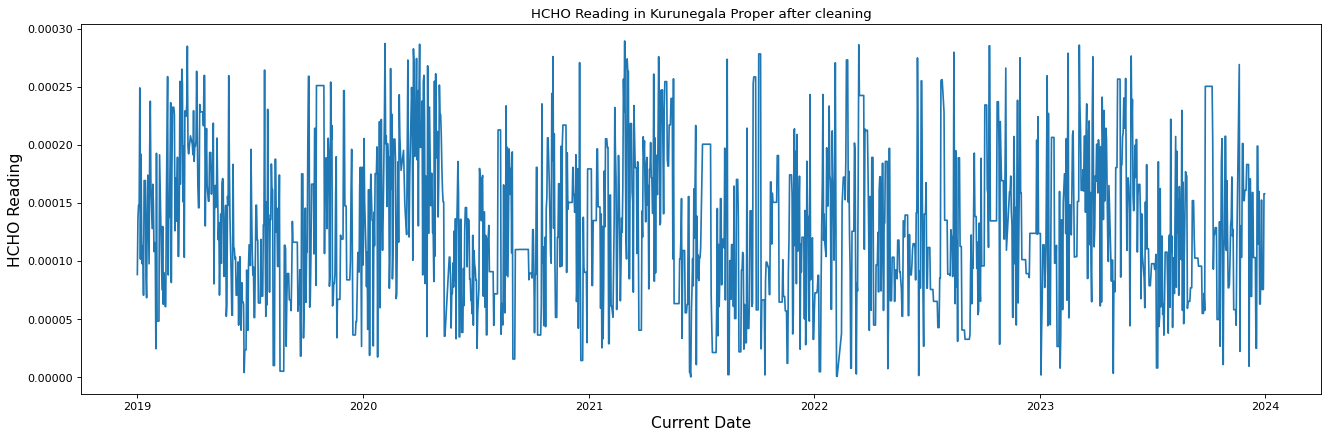

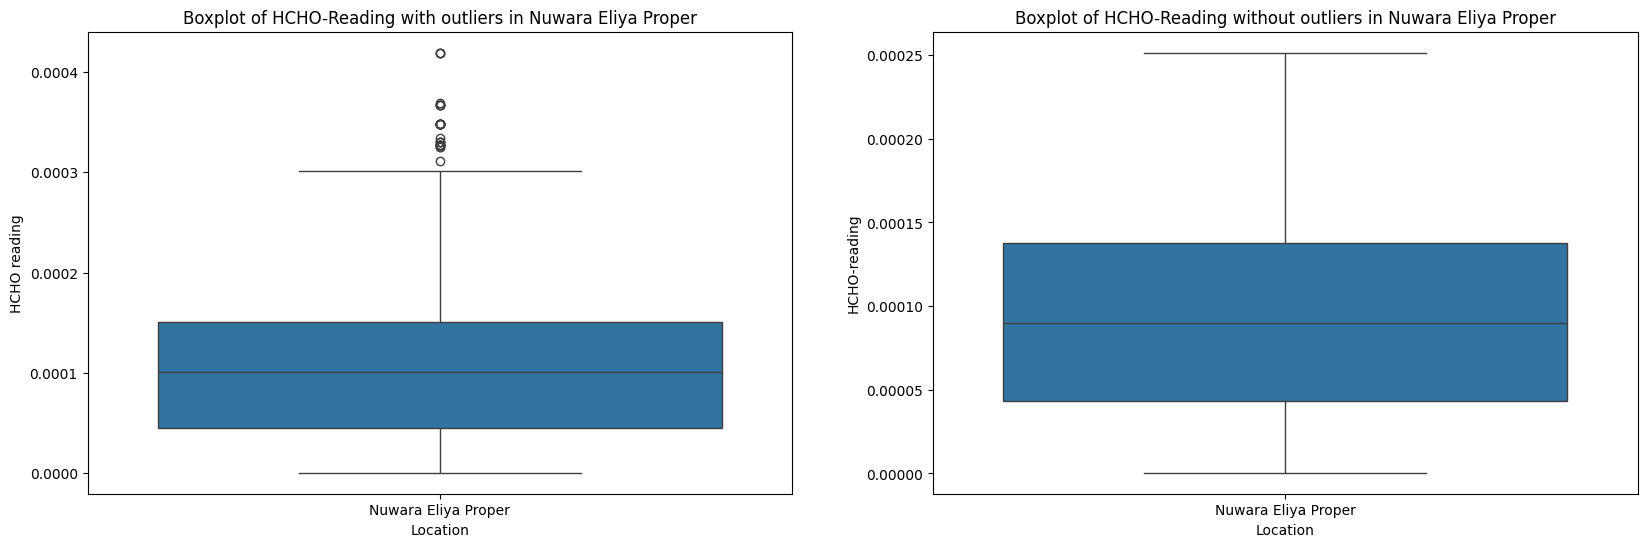

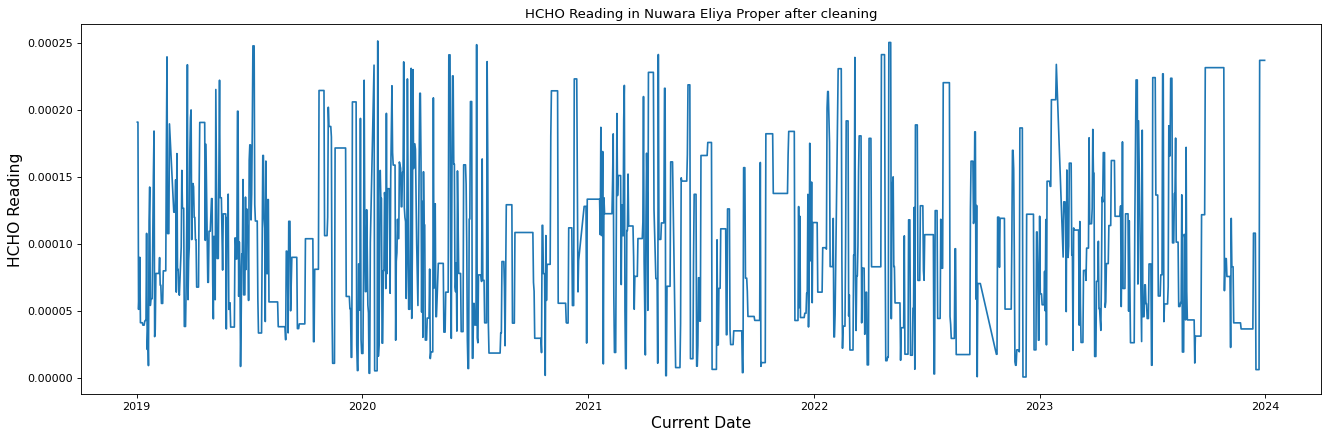

In [64]:
# List to store cleaned datasets
cleaned_datasets = []

# List of locations
locations = ["Deniyaya, Matara", "Bibile, Monaragala", "Colombo Proper", "Jaffna Proper", "Kandy Proper", "Kurunegala Proper", "Nuwara Eliya Proper"]

# Clean data of each location and store the result
for location_name in locations:
    location_df = full_data.filter(full_data["Location"] == location_name)
    handled_missing_values_df = handling_missing_values(location_df,location_name)
    outlier_handled_location_df = handling_outliers(handled_missing_values_df, location_name)
    cleaned_datasets.append(outlier_handled_location_df)

In [65]:
# Combine the cleaned datasets into a single DataFrame
cleaned_full_df = cleaned_datasets[0]
for df in cleaned_datasets[1:]:
    cleaned_full_df = cleaned_full_df.union(df)
cleaned_full_df = cleaned_full_df.drop("z_score")
# Show the cleaned dataset
cleaned_full_df.show(50)

+--------------------+----------------+------------+----------+
|        HCHO reading|        Location|Current Date| Next Date|
+--------------------+----------------+------------+----------+
|1.161015238442796...|Deniyaya, Matara|  2023-12-31|2024-01-01|
|1.161015238442796...|Deniyaya, Matara|  2023-12-30|2023-12-31|
|2.277058364470673...|Deniyaya, Matara|  2023-12-29|2023-12-30|
|2.277058364470673...|Deniyaya, Matara|  2023-12-28|2023-12-29|
|2.277058364470673...|Deniyaya, Matara|  2023-12-27|2023-12-28|
| 5.91728579519819E-5|Deniyaya, Matara|  2023-12-26|2023-12-27|
| 7.16594721727925E-5|Deniyaya, Matara|  2023-12-25|2023-12-26|
|6.343488840490688E-5|Deniyaya, Matara|  2023-12-24|2023-12-25|
|5.308124833675956...|Deniyaya, Matara|  2023-12-23|2023-12-24|
|2.168823721318748E-5|Deniyaya, Matara|  2023-12-22|2023-12-23|
|2.168823721318748E-5|Deniyaya, Matara|  2023-12-21|2023-12-22|
|1.282711591571005E-4|Deniyaya, Matara|  2023-12-20|2023-12-21|
|1.102812114834652...|Deniyaya, Matara| 

In [66]:
# Null value count after cleaning
null_value_count = cleaned_full_df.select([F.sum(F.when(F.col(column).isNull(), 1).otherwise(0)).alias(column) for column in combined_df.columns])

null_value_count.show()

+------------+--------+------------+---------+
|HCHO reading|Location|Current Date|Next Date|
+------------+--------+------------+---------+
|           0|       0|           0|        0|
+------------+--------+------------+---------+



In [67]:
# Number of data remaining after cleaning
num_rows = cleaned_full_df.count()
print("Number of rows in cleaned dataset:", num_rows)

Number of rows in cleaned dataset: 12289
